In [1]:
import numpy as np
from time import time

def timer(func):
    def wrapperfunc(*args):
        t0 = time()
        res = func(*args)
        print("this took %1.3fs" % (time()-t0))
        return res
    return wrapperfunc


def memoize(func):
    """
    memoizing function wrapper
    """
    S = {}
    def wrapperfunction(*args):
        if args not in S:
            S[args] = func(*args)
        return S[args]
    return wrapperfunction

    

def constant(const = 1, min_n = 0, max_n=np.inf):
    """
    return function that gives series coefficent for the ith term

    c = const if min_n< = n<=max_n
    
    c = 0 else
    """
    def coeff(i):
        if i >= min_n and i <= max_n:
            return const
        else:
            return 0
    
    return coeff



def cauchy2(a,b):
    """
    returns function that gives coefficient of the cauchy product of 
    two series with coefficients a(n) and b(n)
    
    (it's just the discrete convolution)
    """
    
    @memoize
    def coeff(i):
        return np.sum([a(h)*b(i-h) for h in range(i+1)])
    
    return coeff


def cauchy(*args):
    """
    returns function that gives coefficient of the cauchy product of 
    many series with coefficients a(n) and b(n)
    
    (it's just the discrete convolution)
    
    Maximum recursion depth will be reached for products of too many series.
    
    Evaluation will also become slow.
    """
    if len(args) == 1:
        return args[0]
    
    else:
        return cauchy2(args[0],cauchy(*args[1:]))

In [2]:
a = constant()
b = constant()

c = cauchy(a,b)

d = cauchy(*tuple(500*[a]))

for i in range(10):
    print(i,a(i),b(i),c(i),d(i))

0 1 1 1 1
1 1 1 2 500
2 1 1 3 125250
3 1 1 4 20958500
4 1 1 5 2635531375
5 1 1 6 265661562600
6 1 1 7 22359848185500
7 1 1 8 1616297597409000
8 1 1 9 102432860235795375
9 1 1 10 5781765888864894500


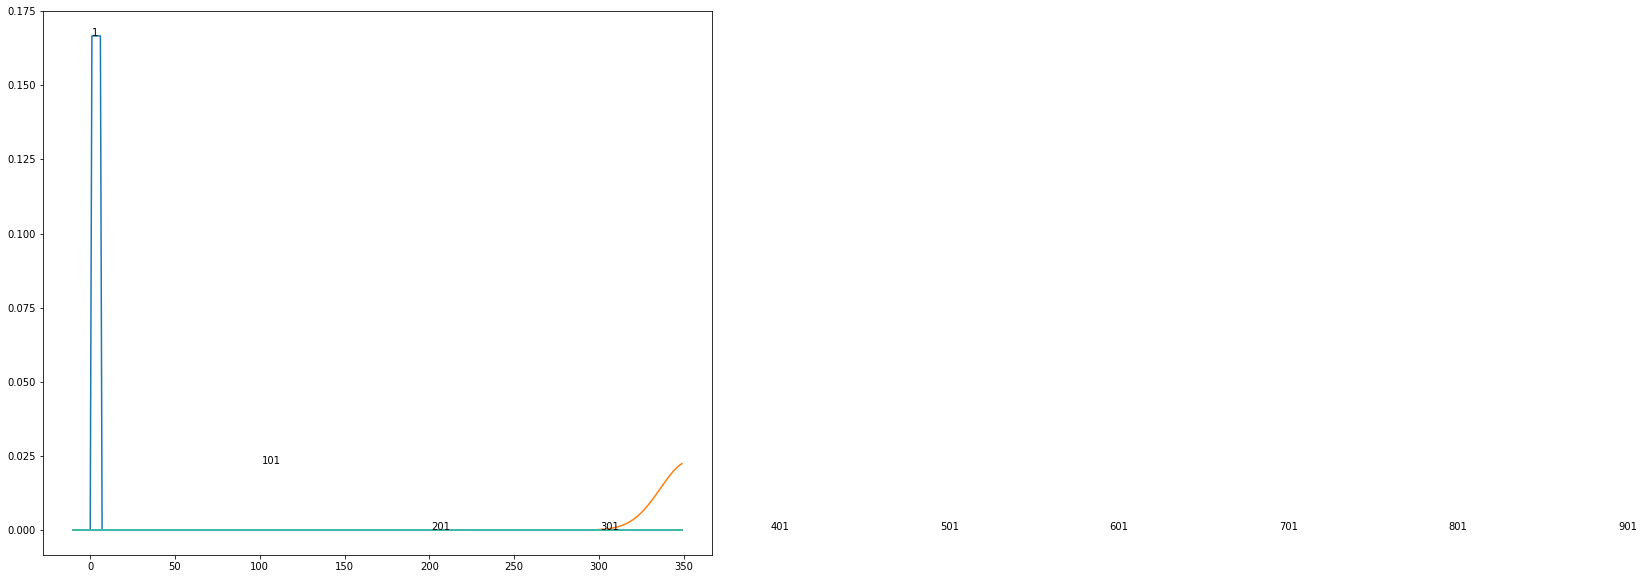

In [6]:
import matplotlib.pyplot as plt 



d6 = constant(const = 1/6, min_n=1,max_n=6)

ss = list(range(-10,35*10))

plt.figure(figsize=(12,10))
for n in range(1,1000)[::100]:

    d = cauchy(*tuple(n*[d6]))

    p = [d(s) for s in ss]
    
    plt.plot(ss,p)
    plt.text(x=n,y=max(p),s=n)
    
    print(n,end='\r')